In [1]:
# 10.2.1
import pandas as pd

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')

In [3]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTATIO', 'B', 'LSTAT', 'MEDV']

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

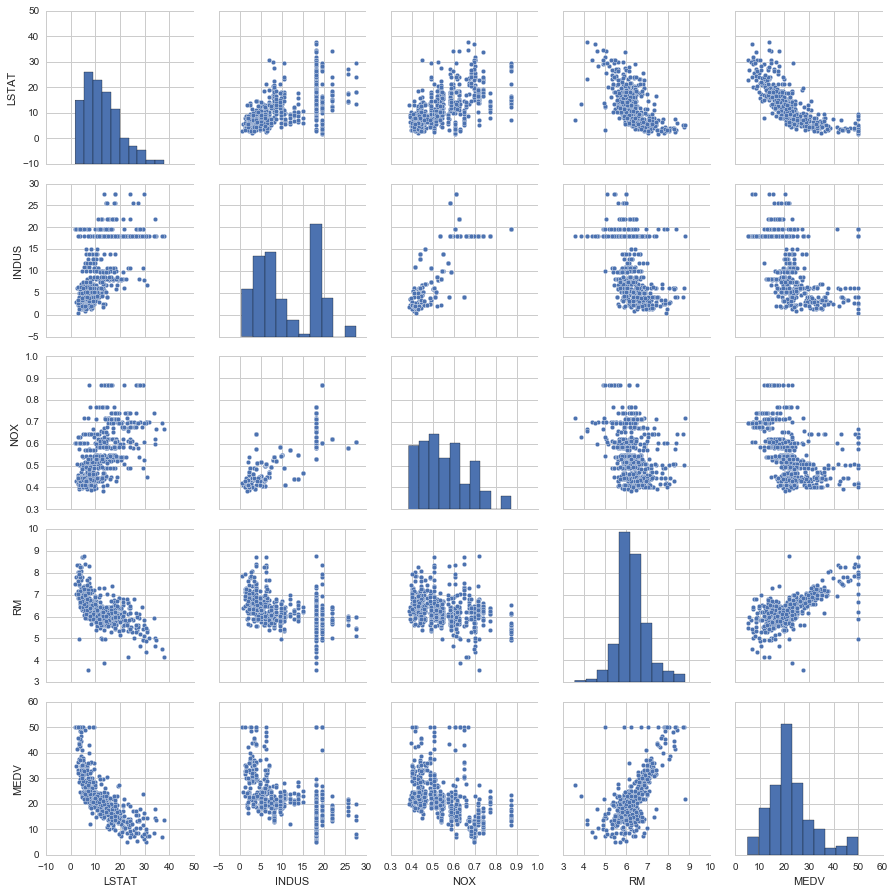

In [17]:
sns.pairplot(df[cols], size=2.5)

In [18]:
import numpy as np

In [19]:
cm = np.corrcoef(df[cols].values.T)

In [20]:
sns.set(font_scale=1.5)

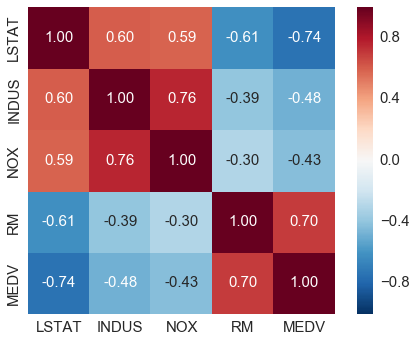

In [22]:
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols, xticklabels=cols)

In [23]:
# 10.3.1
class LinearRegressionGD(object):
    
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:] + self.w_[0])
    
    def predict(self, X):
        return self.net_input(X)

In [24]:
X = df[['RM']].values
y = df['MEDV'].values

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc_x = StandardScaler()
sc_y = StandardScaler()

In [29]:
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

/Users/shuhei.shogen/.pyenv/versions/3.5.2/lib/python3.5/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/shuhei.shogen/.pyenv/versions/3.5.2/lib/python3.5/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [30]:
lr = LinearRegressionGD()

In [31]:
lr.fit(X_std, y_std)

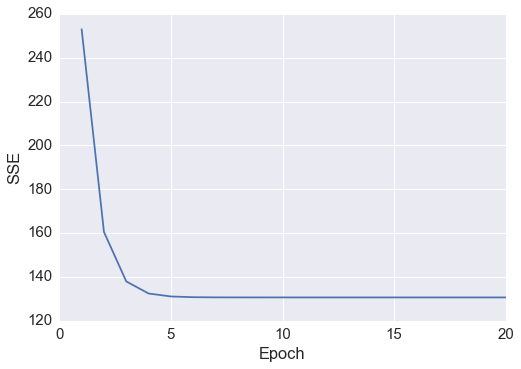

In [34]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [35]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color= 'red')
    return None

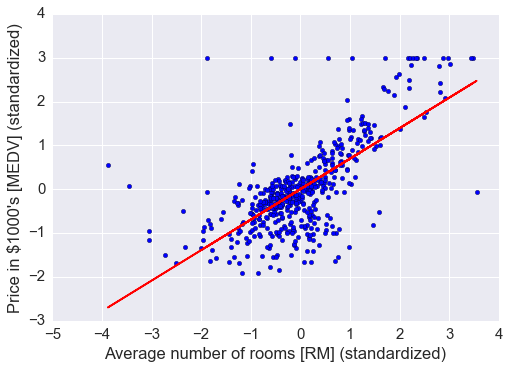

In [39]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s [MEDV] (standardized)')
plt.show()

In [41]:
num_rooms_std = sc_x.transform([5.0])
price_std = lr.predict(num_rooms_std)
print("Price in $1000's: %.3f" % sc_y.inverse_transform(price_std))

Price in $1000's: 10.840


/Users/shuhei.shogen/.pyenv/versions/3.5.2/lib/python3.5/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [42]:
print('Slope: %.3f' % lr.w_[1])

Slope: 0.695


In [56]:
print('Intercept: %.3f' % lr.w_[0])

Intercept: -0.000


In [57]:
# 10.3.2
from sklearn.linear_model import LinearRegression

In [58]:
slr = LinearRegression()
slr.fit(X, y)

/Users/shuhei.shogen/.pyenv/versions/3.5.2/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
print('Slope: %.3f' % slr.coef_[0])

Slope: 9.102


In [61]:
print('Intercept: %.3f' % slr.intercept_)

Intercept: -34.671


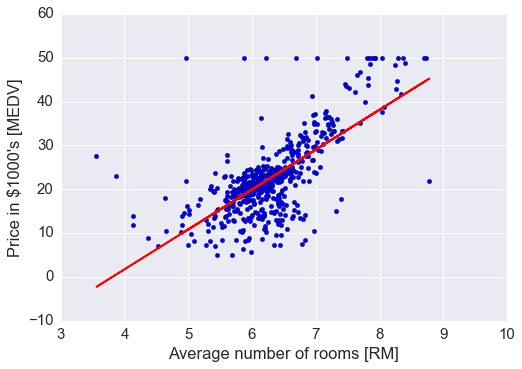

In [62]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.show()

In [63]:
# 10.4
from sklearn.linear_model import RANSACRegressor

In [64]:
ransac = RANSACRegressor(LinearRegression(), max_trials=100, min_samples=50, residual_metric=lambda x: np.sum(np.abs(x), axis=1), residual_threshold=5.0, random_state=0)

In [65]:
ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, max_trials=100,
        min_samples=50, random_state=0,
        residual_metric=<function <lambda> at 0x1161b8048>,
        residual_threshold=5.0, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [66]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [68]:
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

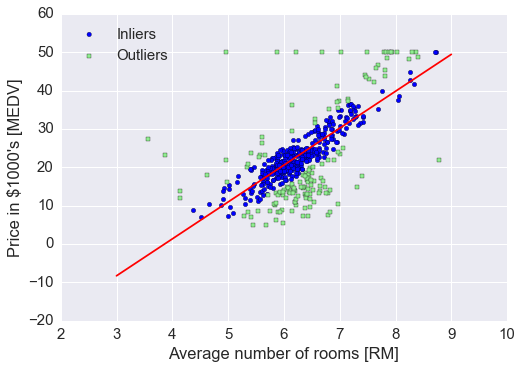

In [71]:
plt.scatter(X[inlier_mask], y[inlier_mask], c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='lightgreen', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper left')
plt.show()

In [72]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])

Slope: 9.621


In [73]:
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Intercept: -37.137


In [75]:
# 10.5
from sklearn.cross_validation import train_test_split

In [79]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [81]:
slr = LinearRegression()
slr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [82]:
y_train_pred = slr.predict(X_train)

In [83]:
y_test_pred = slr.predict(X_test)

(-10, 50)

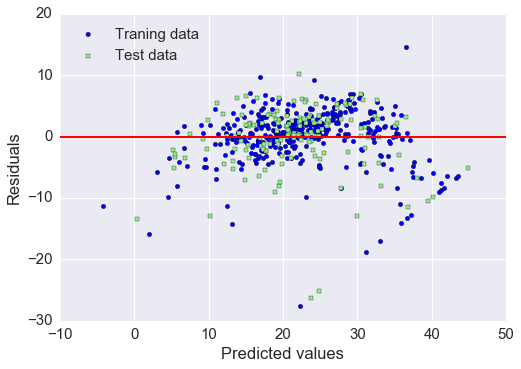

In [84]:
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Traning data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])

In [85]:
from sklearn.metrics import mean_squared_error

In [86]:
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196


In [87]:
from sklearn.metrics import r2_score

In [88]:
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

R^2 train: 0.765, test: 0.673


In [89]:
# 10.6
from sklearn.linear_model import Ridge

In [90]:
ridge = Ridge(alpha=1.0)

In [91]:
from sklearn.linear_model import Lasso

In [92]:
lasso = Lasso(alpha=1.0)

In [96]:
from sklearn.linear_model import ElasticNet

In [97]:
elasticnet = ElasticNet(alpha=1.0, l1_ratio=0.5)

In [98]:
# 10.7
from sklearn.preprocessing import PolynomialFeatures

In [119]:
X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])

In [120]:
lr = LinearRegression()
pr = LinearRegression()

In [121]:
quadratic = PolynomialFeatures(degree=2)

In [122]:
X_quad = quadratic.fit_transform(X)

In [123]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [124]:
X_fit = np.arange(250, 600, 10)[:, np.newaxis]

In [125]:
y_lin_fit = lr.predict(X_fit)

In [126]:
pr.fit(X_quad, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [127]:
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

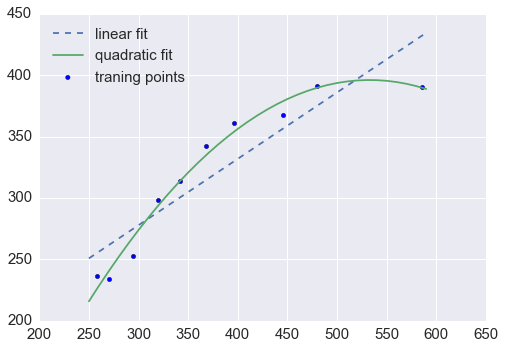

In [128]:
plt.scatter(X, y, label='traning points')
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic fit')
plt.legend(loc='upper left')
plt.show()

In [129]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

In [130]:
print('Training MSE linear: %.3f, quadratic: %.3f' % (mean_squared_error(y, y_lin_pred), mean_squared_error(y, y_quad_pred)))

Training MSE linear: 569.780, quadratic: 61.330


In [131]:
print('Training R^2 linear: %.3f, quadratic: %.3f' % (r2_score(y, y_lin_pred), r2_score(y, y_quad_pred)))

Training R^2 linear: 0.832, quadratic: 0.982


In [132]:
# 10.7.1
X = df[['LSTAT']].values
y = df['MEDV'].values

In [137]:
regr = LinearRegression()

In [138]:
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)

In [139]:
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

In [142]:
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

In [145]:
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

In [144]:
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

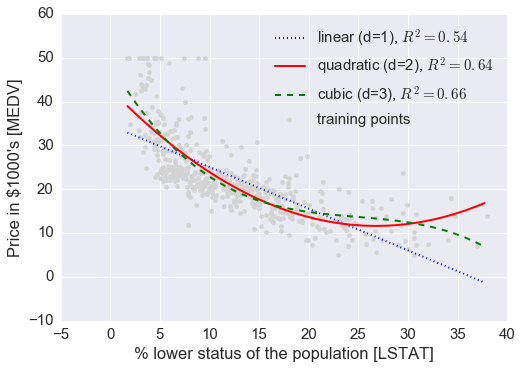

In [147]:
plt.scatter(X, y, label='training points', color='lightgray')
plt.plot(X_fit, y_lin_fit, label='linear (d=1), $R^2=%.2f$' % linear_r2, color='blue', lw=2, linestyle=':')
plt.plot(X_fit, y_quad_fit, label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2, color='red', lw=2, linestyle='-')
plt.plot(X_fit, y_cubic_fit, label='cubic (d=3), $R^2=%.2f$' % cubic_r2, color='green', lw=2, linestyle='--')
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper right')
plt.show()

In [148]:
X_log = np.log(X)
y_sqrt = np.sqrt(y)

In [150]:
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]
regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

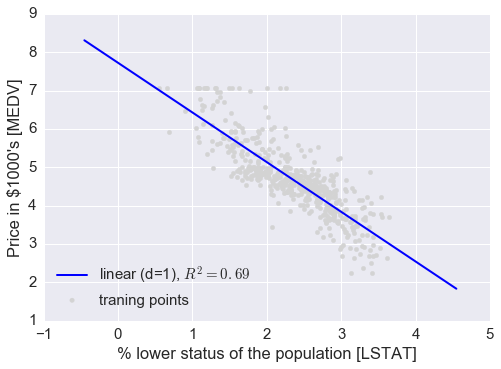

In [152]:
plt.scatter(X_log, y_sqrt, label='traning points', color='lightgray')
plt.plot(X_fit, y_lin_fit, label='linear (d=1), $R^2=%.2f$' % linear_r2, color='blue', lw=2)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='lower left')
plt.show()

In [153]:
# 10.7.2
from sklearn.tree import DecisionTreeRegressor

In [154]:
X = df[['LSTAT']].values
y = df['MEDV'].values

In [155]:
tree = DecisionTreeRegressor(max_depth=3)

In [156]:
tree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [161]:
sort_idx = X.flatten().argsort()

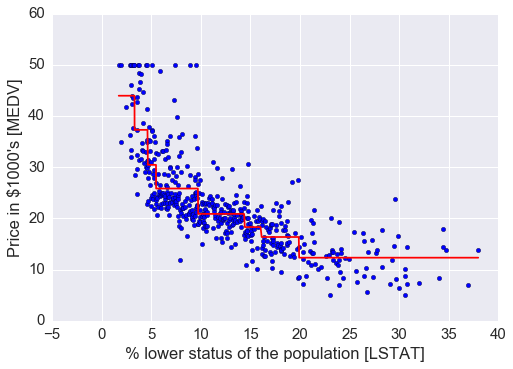

In [162]:
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.show()

In [163]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [165]:
from sklearn.ensemble import RandomForestRegressor

In [166]:
forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)

In [167]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=-1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [168]:
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

In [169]:
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

MSE train: 1.642, test: 11.052


In [170]:
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

R^2 train: 0.979, test: 0.878


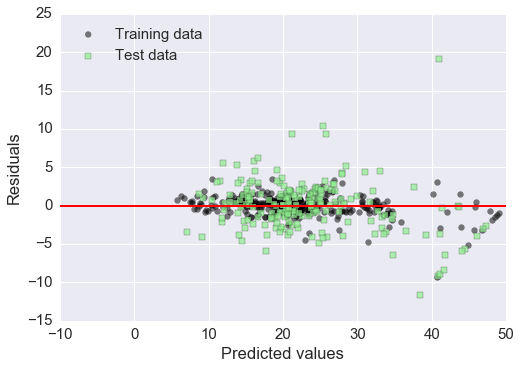

In [172]:
plt.scatter(y_train_pred, y_train_pred - y_train, c='black', marker='o', s=35, alpha=0.5, label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', s=35, alpha=0.7, label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, colors='red')
plt.xlim([-10, 50])
plt.show()